In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import pandas_datareader.data as web
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [11]:
style.use('ggplot')
df=pd.read_csv('TSLA.csv',parse_dates=True,index_col=0)

In [12]:
df_ohlc=df['Adj Close'].resample('10D').ohlc()
df_volume=df['Volume'].resample('10D').sum()

In [13]:
print(df_ohlc.head())

                 open       high        low      close
Date                                                  
2014-12-31  44.481998  44.481998  41.332001  41.332001
2015-01-10  40.442001  40.849998  38.374001  38.613998
2015-01-20  38.386002  41.310001  38.386002  41.040001
2015-01-30  40.720001  44.198002  40.720001  43.472000
2015-02-09  43.495998  43.495998  40.576000  40.891998


In [19]:
print(df_volume)

Date
2014-12-31    148857500.0
2015-01-10    153996000.0
2015-01-20    144624500.0
2015-01-30    110273000.0
2015-02-09    235829000.0
                 ...     
2020-08-31    697519400.0
2020-09-10    561432200.0
2020-09-20    547840300.0
2020-09-30    376660700.0
2020-10-10    189592600.0
Freq: 10D, Name: Volume, Length: 212, dtype: float64


In [14]:
df_ohlc.reset_index(inplace=True)
df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)

In [15]:
print(df_ohlc.head())

       Date       open       high        low      close
0  735598.0  44.481998  44.481998  41.332001  41.332001
1  735608.0  40.442001  40.849998  38.374001  38.613998
2  735618.0  38.386002  41.310001  38.386002  41.040001
3  735628.0  40.720001  44.198002  40.720001  43.472000
4  735638.0  43.495998  43.495998  40.576000  40.891998


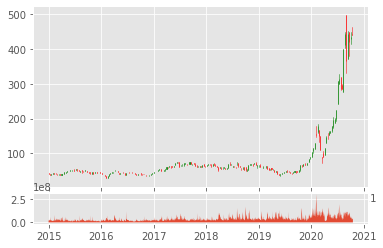

In [17]:
ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1,df_ohlc.values,colorup='g')
ax2.fill_between(df['Volume'].index.map(mdates.date2num),df['Volume'].values,0)
plt.show()